In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# generating training data
w = -0.1+1.0j
x0 = 0.5+0.5j
dt_integration =0.01
T0 = 0
Tf = 10
time = np.arange(0,Tf+0.000001,dt_integration)

True_sol = []
for i in range(len(time)):
    True_sol.append(x0*np.exp(w*T0)*np.exp(w*time[i]))
True_sol = np.array(True_sol)

In [3]:
x      = torch.cat((torch.from_numpy(True_sol.real).unsqueeze(-1),torch.from_numpy(True_sol.imag).unsqueeze(-1)),dim = -1)
x_grad = torch.gradient(x)[0]/dt_integration

In [4]:
A = #... code something :)

In [5]:
x02d = torch.from_numpy(np.array([x0.real,x0.imag])).unsqueeze(0)
LinReg_sol = []
for i in range(len(time)):
    LinReg_sol.append(torch.mm(torch.mm(x02d,torch.matrix_exp(A*T0)),torch.matrix_exp(A*time[i])))
LinReg_sol = torch.stack(LinReg_sol)

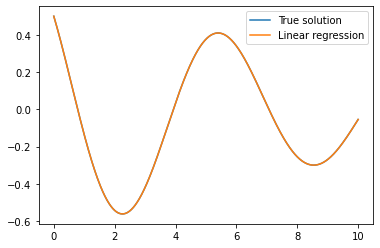

In [6]:
plt.plot(time,True_sol.real,label = 'True solution')
plt.plot(time,LinReg_sol[:,0,0],label = 'Linear regression')
plt.legend()

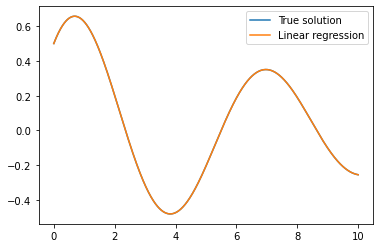

In [7]:
plt.plot(time,True_sol.imag,label = 'True solution')
plt.plot(time,LinReg_sol[:,0,1],label = 'Linear regression')
plt.legend()